In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from bremsstrahlung import br_cdf_sp_gauss, br_cdf_sp_quad
from screening import Fermi_length

# Style of the plot
plt.style.use('../../utils/minimal.style')

In [2]:
# Physical parameters
Z = 29
T1 = 100. # 100 keV
g1 = 1. + T1 / 511.
Lf = Fermi_length(Z)

In [3]:
# discretization of k axis
Nk = 100
axis_k_lin  = np.linspace(0., g1-1., Nk)
axis_k_log  = np.logspace(np.log10(1.e-7*(g1-1.)), np.log10(g1-1.), Nk)

In [4]:
# Compute the CDF with three methods
cdf_quad = np.array([br_cdf_sp_quad(Z, k, g1, Lf) for k in axis_k_lin])
cdf_gauss_lin = np.array([br_cdf_sp_gauss(Z, k, g1, Lf, False) for k in axis_k_lin])
cdf_gauss_log = np.array([br_cdf_sp_gauss(Z, k, g1, Lf, True) for k in axis_k_log])
cdf_gauss_log[0] = 0.0

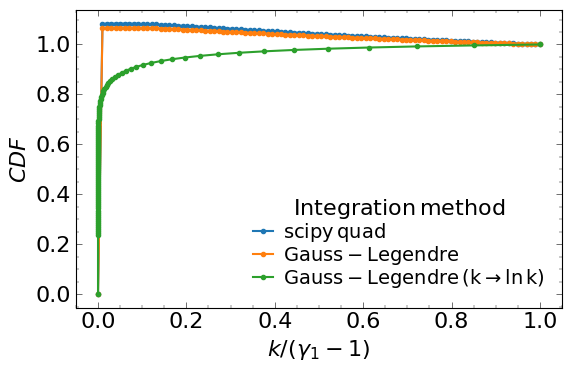

In [5]:
# Figure
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(axis_k_lin/(g1-1.), cdf_quad, marker='o', label=r'$\rm scipy \, \rm quad$')
axs.plot(axis_k_lin/(g1-1.), cdf_gauss_lin, marker='o', label=r'$\rm Gauss-Legendre $')
axs.plot(axis_k_log/(g1-1.), cdf_gauss_log, marker='o', label=r"$ \rm Gauss-Legendre \, ( k\rightarrow \ln k )$")
#axs.set_xscale('log')
axs.set_xlabel(r"$ k / (\gamma_1 -1) $")
axs.set_ylabel(r"$ CDF $")
#axs.set_ylim([-0.1, 1.5])
plt.legend(loc='best', title=r"$ \rm Integration \, \rm method $")
plt.tight_layout()
fig.savefig('../figures/CDF_integration_method', bbox_inches='tight')

plt.show()